# Backprop guide: basic numpy code

This code appears in the main notebook, but here it is on its own.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # For plotting things
from sklearn.datasets import load_digits # Data to be used

Below is the main part of the code. It will train itself to recognize the digits. The line with `MyNeuralNetwork = NeuralNetwork(64, 64, 10)` is the one you want to modify to change the input, hidden, and output sizes respectively.

In [2]:
# This class stores the NN's parameters
class NeuralNetwork:
    # This is the constructor: it's called as the object is created
    def __init__(self, input_size, hidden_size, output_size):
        self.b1 = np.random.normal(size=(1,hidden_size))
        self.w1 = np.random.normal(size=(input_size,hidden_size))
        self.b2 = np.random.normal(size=(1,hidden_size))
        self.w2 = np.random.normal(size=(hidden_size,hidden_size))
        self.b_out = np.random.normal(size=(1,output_size))
        self.w_out = np.random.normal(size=(hidden_size,output_size))

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# This is the negative log-likelihood cost
def NLLcost(a_out, y):
    return -np.mean(np.sum(y*np.log(a_out) + (1.0-y)*np.log(1.0-a_out), 1))

# Calculating accuracy
def accuracy(a_out, labels):
    # The following will return True if the maximum index of the output activation
    # is the same as the label
    tests = a_out.argmax(axis=1) == labels
    return(tests.sum() / a_out.shape[0])

# Feed forward
def feedforward(x, NN):
    # as you can see, feed forward is short and sweet
    z1 = x @ NN.w1 + NN.b1
    a1 = sigmoid(z1)
    z2 = a1 @ NN.w2 + NN.b2
    a2 = sigmoid(z2)
    z_out = a2 @ NN.w_out + NN.b_out
    a_out = sigmoid(z_out)
    return a1, a2, a_out

# Back propagation
# You can see all of the steps written out a few sections above
def backprop(x, y, NN, a1, a2, a_out):
    # prepare a row vector of ones of width equal to the batch size
    ones = np.ones((1, x.shape[0])) # this ensures the bias gradient is the right shape
    # output parameters
    delta = (a_out - y) # the error
    w_out_grad = a2.transpose() @ delta # gradient for w_out
    b_out_grad = ones @ delta # gradient for b_out
    delta_out = delta @ NN.w_out.transpose() # the delta passed on to the next layer
    # layer 2 parameters
    prime2 = a2 * (1.0 - a2) # the derivative of the sigmoid
    w2_grad = a1.transpose() @ (prime2 * delta_out) # w2 gradient
    b2_grad = ones @ (prime2 * delta_out) # b2 gradient
    delta2 = delta_out * prime2 @ NN.w2.transpose() # layer 2's delta
    # layer 1 parameters
    prime1 = a1 * (1.0 - a1) # derivative of the sigmoid
    w1_grad = x.transpose() @ (prime1 * delta2) # w1 gradient
    b1_grad = ones @ (prime1 * delta2) # b1 gradient
    return w_out_grad, b_out_grad, w2_grad, b2_grad, w1_grad, b1_grad

# Updates the parameters
def step(NN, w2_grad, b2_grad, w1_grad, b1_grad, w_out_grad, b_out_grad, lr, batch_size):
    # Note
    NN.w1 = NN.w1 - (lr / batch_size) * w1_grad
    NN.b1 = NN.b1 - (lr / batch_size) * b1_grad
    NN.w2 = NN.w2 - (lr / batch_size) * w2_grad
    NN.b2 = NN.b2 - (lr / batch_size) * b2_grad
    NN.w_out = NN.w_out - (lr / batch_size) * w_out_grad
    NN.b_out = NN.b_out - (lr / batch_size) * b_out_grad

# Set our learning rate
lr = 0.1
# Initialize a neural network    
MyNeuralNetwork = NeuralNetwork(64, 64, 10)
# Load the data, this time with labels, index 0 is the input, 1 is the output
digits = load_digits(n_class=10, return_X_y=True)
# A sloppy data rescale (16 is the max pixel intensity)
x = digits[0]/16
# Create one-hot vectors for the outputs
# I am lucky here that the digits are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# Otherwise you would need a label dictionary to concert indices back to their labels
y = np.eye(10)[digits[1]]
# We'll do batches of 10... we need to find out the indexes to use
batch_size = 10
batch_pos = list(range(0, digits[0].data.shape[0] - 1, batch_size))
batch_amount = len(batch_pos)
epochs = 10
for ep in range(1, epochs+1):
    batch_num = 1
    for b in batch_pos:
        batch_x = x[b:b+batch_size]
        batch_y = y[b:b+batch_size]
        a1, a2, a_out = feedforward(batch_x, MyNeuralNetwork)
        cost = NLLcost(a_out, batch_y)
        w_out_grad, b_out_grad, w2_grad, b2_grad, w1_grad, b1_grad \
            = backprop(batch_x, batch_y, MyNeuralNetwork, a1, a2, a_out)
        step(MyNeuralNetwork, w2_grad, b2_grad, w1_grad, b1_grad, w_out_grad, b_out_grad, lr, batch_size)
        if batch_num % 50 == 0:
            print("epoch {:3d}, batch {:3d}, lr {:7.5f}, loss {:6.2f}".format(ep, batch_num, lr, cost))
        batch_num += 1
    lr *= 0.75
    a1, a2, a_out = feedforward(x, MyNeuralNetwork)
    print("accuracy {:6.2f}%".format(100 * accuracy(a_out, digits[1])))

epoch   1, batch  50, lr 0.10000, loss   2.09
epoch   1, batch 100, lr 0.10000, loss   2.11
epoch   1, batch 150, lr 0.10000, loss   1.23
accuracy  76.91%
epoch   2, batch  50, lr 0.07500, loss   1.51
epoch   2, batch 100, lr 0.07500, loss   1.31
epoch   2, batch 150, lr 0.07500, loss   0.87
accuracy  87.09%
epoch   3, batch  50, lr 0.05625, loss   1.38
epoch   3, batch 100, lr 0.05625, loss   0.98
epoch   3, batch 150, lr 0.05625, loss   0.73
accuracy  90.09%
epoch   4, batch  50, lr 0.04219, loss   1.29
epoch   4, batch 100, lr 0.04219, loss   0.83
epoch   4, batch 150, lr 0.04219, loss   0.65
accuracy  91.04%
epoch   5, batch  50, lr 0.03164, loss   1.24
epoch   5, batch 100, lr 0.03164, loss   0.74
epoch   5, batch 150, lr 0.03164, loss   0.61
accuracy  92.26%
epoch   6, batch  50, lr 0.02373, loss   1.19
epoch   6, batch 100, lr 0.02373, loss   0.69
epoch   6, batch 150, lr 0.02373, loss   0.58
accuracy  92.93%
epoch   7, batch  50, lr 0.01780, loss   1.16
epoch   7, batch 100, lr

Here's some code for testing results.

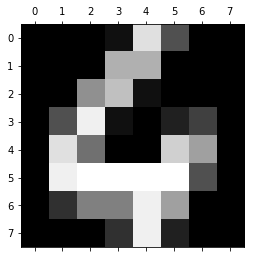

I predict  4,  98.43% certain


In [3]:
def predict(x, NN):
    pick = np.random.randint(1, x.shape[0])
    image = np.reshape(x[pick,], (8,8))
    plt.gray()
    plt.matshow(image) 
    plt.show() 
    _, _, a_out = feedforward(x[pick,], NN)
    # The certainty here is the value of the highest output activation
    print("I predict {:2d}, {:6.2f}% certain".format(np.asscalar(a_out.argmax(axis=1)), 100.0*np.max(a_out)))

predict(x, MyNeuralNetwork)